# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Dataset**

In [2]:
df = pd.read_csv('vg_sales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


This dataset consists of **16598 rows** and **11 columns**. The following is a description of the dataset that will be analyzed to help understand what data we will use in this project.

**Contents**:
* `Rank` = Games rank.
* `Name` = The games name.
* `Platform` = Platform of the games release (i.e. PC,PS4, etc.).
* `Year` = Year of the game's release.
* `Genre` = Genre of the game.
* `Publisher` = Publisher of the game.
* `NA_Sales` = Sales in North America (in millions).
* `EU_Sales` = Sales in Europe (in millions).
* `JP_Sales` = Sales in Japan (in millions).
* `Other_Sales` = Sales in the rest of the world (in millions).
* `Global_Sales` = Total worldwide sales (in millions).

**Observation**:
1. Need to drop `Rank` column, because unique.
2. Need to be cleansing, there are some null value in some column.
3. Need to change `Year` column Dtype to `int64`.

# **Data Preprocessing**

## Delete Column

In [4]:
df.drop(['Rank'],axis=1,inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


`Rank` column has been deleted.

## Missing Value

In [5]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature', 'missing_value']
data_null['percentage'] = round((data_null['missing_value'] / len(df)) * 100, 2)
data_null = data_null.sort_values('percentage', ascending = False).reset_index(drop = True)
data_null = data_null[data_null['percentage'] > 0]
data_null

,feature,missing_value,percentage
0,Year,271,1.63
1,Publisher,58,0.35


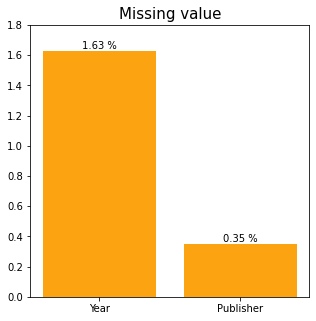

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = data_null['feature'], height = data_null['percentage'], color = '#fca311')
plt.title('Missing value',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

plt.ylim(0,1.8)
plt.show()

In [7]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

let's drop missing value.

In [8]:
df = df.dropna().reset_index(drop=True)
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

There are no more Missing Value.

In [9]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

at 2017 and 2020 there is abnormal value, in this case they will be drop, so we just analyze video games sales until 2016.

In [10]:
df = df[df['Year'] < 2017].reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16282,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16283,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16284,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16285,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Duplicated Value

In [11]:
df.duplicated().sum()

0

There isn't duplicate data.

## Change Data Type

In [12]:
df['Year'] = pd.to_numeric(df['Year'],errors='coerce').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16287 entries, 0 to 16286
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16287 non-null  object 
 1   Platform      16287 non-null  object 
 2   Year          16287 non-null  int64  
 3   Genre         16287 non-null  object 
 4   Publisher     16287 non-null  object 
 5   NA_Sales      16287 non-null  float64
 6   EU_Sales      16287 non-null  float64
 7   JP_Sales      16287 non-null  float64
 8   Other_Sales   16287 non-null  float64
 9   Global_Sales  16287 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


**Observation**:

1. Now there is only **16287 rows** & **10 columns** data left.
2. `Year` column Dtype has been changed to `int64`.

# **EDA Questions & Conclussion**

1. Distribution of quantitative variables
  * The 10 most frequent years in the database?
  * The 10 least frequent years in the database?
  * Sales distribution in each region?
2. Distribution of qualitative variables
  * The 5 most frequent games in the database?
  * The 5 most frequent gaming platforms in the database?
  * Genre distribution?
  * The 10 most frequent Publisher in the database?
3. Analysis of the world's best-selling games
  * The 10 best selling games in North America, Europe, Japan and the rest of the world?
  * The 10 best selling games in the world from 1990 to 2000?
4. Number of Sales per platform
  * The 10 platforms with the highest number of game sales in the world?
5. Game Sales by Genre
  * Best selling genres in the world?
6. Number of sales per publisher
  * The 10 publishers with the most sales?
7. Global Sales Number per Year

## 1. Distribution of quantitative variables

To answer this question, first we need to use the `Year` column.

### The 10 most frequent years in the database?

In [13]:
most10_year = (df
               .groupby('Year')
               .agg(freq=('Year','count'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('Year',ascending=False)
               .reset_index(drop = True)
               )
most10_year

,Year,freq
0,2011,1136
1,2010,1257
2,2009,1431
3,2008,1428
4,2007,1201
5,2006,1008
6,2005,936
7,2004,744
8,2003,775
9,2002,829


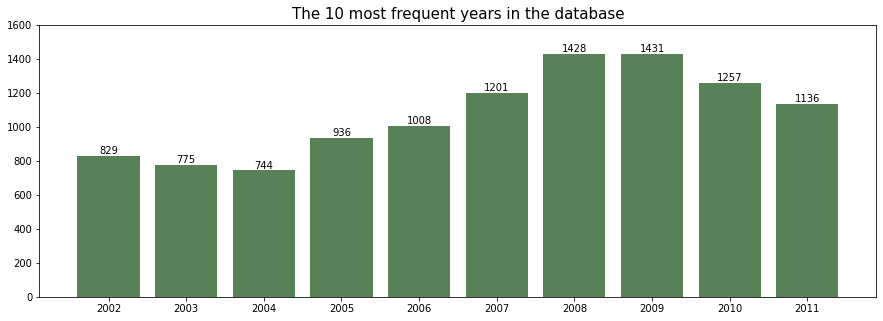

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
bars = plt.bar(x = most10_year['Year'], height = most10_year['freq'], color= '#588157')
plt.xticks(list(range(2002,2012,1)))
plt.title('The 10 most frequent years in the database',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom'
  )

plt.ylim(0,1600)
plt.show()

**The top 10 most frequent** of video games were release in **2002 - 2011**, and **the most frequent** of video game were release in **2009**, which is **1431** number of video games.

### The 10 least frequent years in the database?

In [15]:
least10_year = (df
                .groupby('Year')
                .agg(freq=('Year','count'))
                .reset_index()
                .sort_values('freq',ascending=True)
                .head(10)
                .sort_values('Year',ascending=False)
                .reset_index(drop = True)
                )
least10_year

,Year,freq
0,1990,16
1,1989,17
2,1988,15
3,1987,16
4,1986,21
5,1985,14
6,1984,14
7,1983,17
8,1982,36
9,1980,9


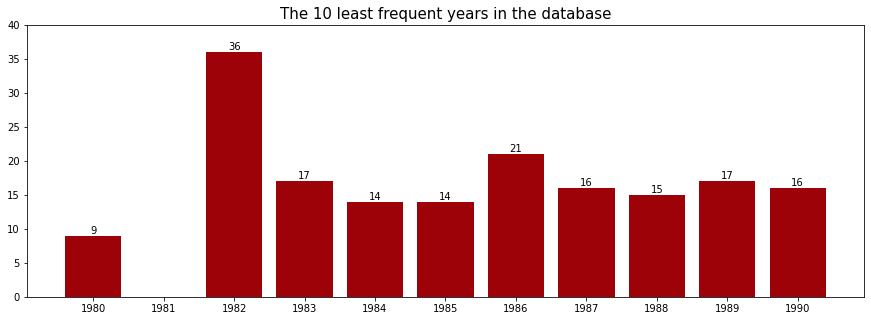

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
bars = plt.bar(x = least10_year['Year'], height = least10_year['freq'], color= '#9d0208')
plt.xticks(list(range(1980,1991,1)))
plt.title('The 10 least frequent years in the database',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom'
  )

plt.ylim(0,40)
plt.show()

**The top 10 least frequent** of video games were release in **1980 - 1990**, and **the least frequent** of video game were release in **1980**, which is **9** number of video games.

### Sales distribution in each region?

**North America**

In [17]:
NA = (df
      .groupby('NA_Sales')
      .agg(freq=('NA_Sales','count'))
      .reset_index()
      .sort_values('freq',ascending=False)
      .reset_index(drop = True)
      )
NA

,NA_Sales,freq
0,0.00,4427
1,0.02,536
2,0.03,525
3,0.01,524
4,0.05,521
...,...,...
403,3.49,1
404,3.50,1
405,3.51,1
406,3.59,1


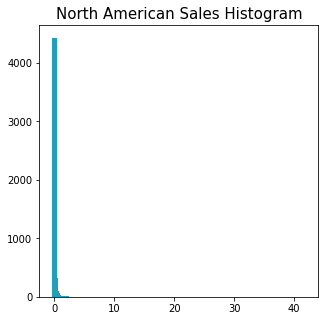

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = NA['NA_Sales'], height = NA['freq'], color= '#219ebc')
plt.title('North American Sales Histogram',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2

plt.show()

In [19]:
NA = NA[NA['NA_Sales'] <= 10].sort_values('freq',ascending=False)
NA

,NA_Sales,freq
0,0.00,4427
1,0.02,536
2,0.03,525
3,0.01,524
4,0.05,521
...,...,...
295,9.54,1
293,6.63,1
292,6.76,1
291,5.08,1


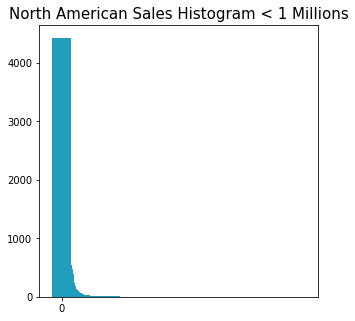

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = NA['NA_Sales'], height = NA['freq'], color= '#219ebc')
plt.xticks(list(range(0,1)))
plt.title('North American Sales Histogram < 1 Millions',fontsize=15)

plt.show()

**Europe**

In [21]:
EU = (df
      .groupby('EU_Sales')
      .agg(freq=('EU_Sales','count'))
      .reset_index()
      .sort_values('freq',ascending=False)
      .reset_index(drop = True)
      )
EU

,EU_Sales,freq
0,0.00,5620
1,0.01,1464
2,0.02,1248
3,0.03,916
4,0.04,736
...,...,...
300,2.55,1
301,2.51,1
302,2.47,1
303,2.43,1


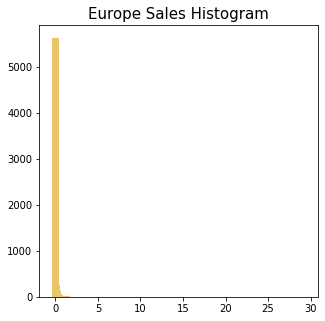

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = EU['EU_Sales'], height = EU['freq'], color= '#e9c46a')
plt.title('Europe Sales Histogram',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2

plt.show()

In [23]:
EU = EU[EU['EU_Sales'] <= 10].sort_values('freq',ascending=False)
EU

,EU_Sales,freq
0,0.00,5620
1,0.01,1464
2,0.02,1248
3,0.03,916
4,0.04,736
...,...,...
231,8.59,1
230,8.89,1
229,9.20,1
227,9.26,1


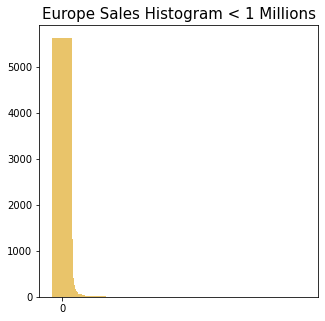

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = EU['EU_Sales'], height = EU['freq'], color= '#e9c46a')
plt.xticks(list(range(0,1)))
plt.title('Europe Sales Histogram < 1 Millions',fontsize=15)

plt.show()

**Japan**

In [25]:
JP = (df
      .groupby('JP_Sales')
      .agg(freq=('JP_Sales','count'))
      .reset_index()
      .sort_values('freq',ascending=False)
      .reset_index(drop = True)
      )
JP

,JP_Sales,freq
0,0.00,10206
1,0.02,718
2,0.01,692
3,0.03,522
4,0.04,391
...,...,...
239,1.97,1
240,1.91,1
241,1.89,1
242,1.81,1


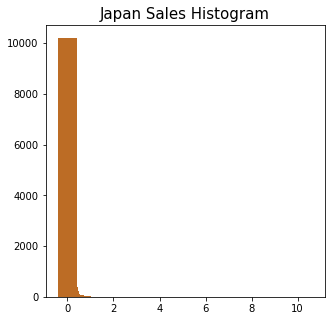

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = JP['JP_Sales'], height = JP['freq'], color= '#bc6c25')
plt.title('Japan Sales Histogram',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2

plt.show()

**Global**

In [27]:
GB = (df
      .groupby('Global_Sales')
      .agg(freq=('Global_Sales','count'))
      .reset_index()
      .sort_values('freq',ascending=False)
      .reset_index(drop = True)
      )
GB

,Global_Sales,freq
0,0.02,1045
1,0.03,794
2,0.04,634
3,0.05,624
4,0.01,598
...,...,...
616,5.01,1
617,5.05,1
618,5.07,1
619,5.11,1


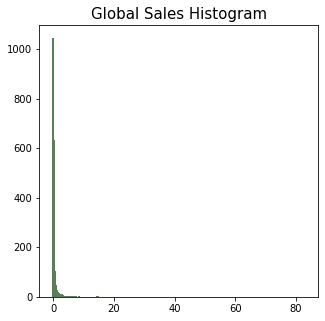

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = GB['Global_Sales'], height = GB['freq'], color= '#588157')
plt.title('Global Sales Histogram',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2

plt.show()

In [29]:
GB = GB[GB['Global_Sales'] <= 10].sort_values('freq',ascending=False)
GB

,Global_Sales,freq
0,0.02,1045
1,0.03,794
2,0.04,634
3,0.05,624
4,0.01,598
...,...,...
496,3.58,1
497,3.59,1
498,3.60,1
499,3.62,1


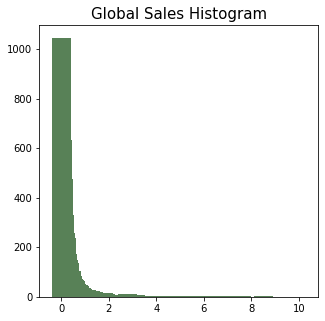

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
bars = plt.bar(x = GB['Global_Sales'], height = GB['freq'], color= '#588157')
plt.title('Global Sales Histogram',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2

plt.show()

## 2. Distribution of qualitative variables

### The 5 most frequent games in the database?

In [31]:
most5_game = (df
               .groupby('Name')
               .agg(freq=('Name','count'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(5)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
most5_game

,Name,freq
0,The LEGO Movie Videogame,8
1,LEGO Marvel Super Heroes,9
2,Ratatouille,9
3,FIFA 14,9
4,Need for Speed: Most Wanted,12


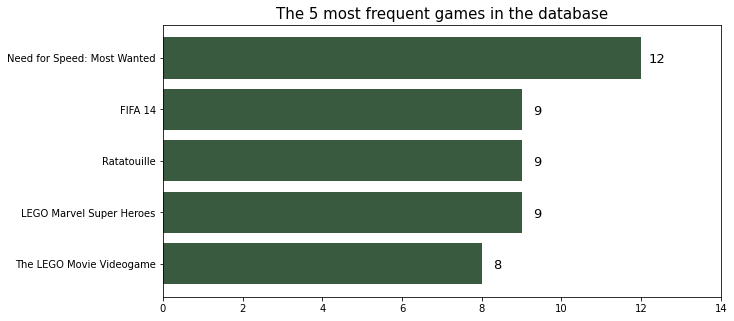

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
bars = plt.barh(y = most5_game['Name'], width = most5_game['freq'], color= '#3a5a40')
plt.title('The 5 most frequent games in the database',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+0.4, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,14)
plt.show()

**The most frequent** of game in dataset is **Need for Speed: Most Wanted**, which is **12** times.

### The 5 most frequent gaming platforms in the database?

In [33]:
most5_platform = (df
                  .groupby('Platform')
                  .agg(freq=('Platform','count'))
                  .reset_index()
                  .sort_values('freq',ascending=False)
                  .head(5)
                  .sort_values('freq',ascending=True)
                  .reset_index(drop = True)
                  )
most5_platform

,Platform,freq
0,X360,1234
1,Wii,1290
2,PS3,1304
3,PS2,2127
4,DS,2130


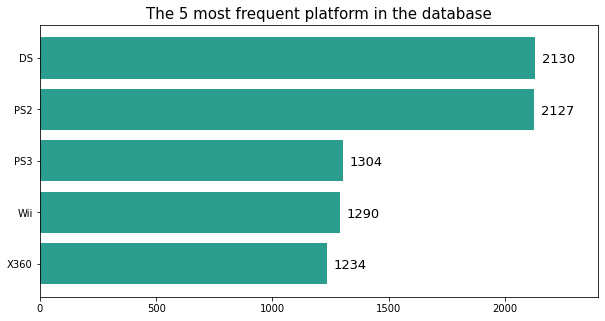

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
bars = plt.barh(y = most5_platform['Platform'], width = most5_platform['freq'], color= '#2a9d8f')
plt.title('The 5 most frequent platform in the database',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+100, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,2400)
plt.show()

**The most frequent** of platform in dataset is **DS**, which is **2130** times.

### Genre distribution?

In [35]:
genre_dist = (df
              .groupby('Genre')
              .agg(freq=('Genre','count'))
              .reset_index()
              .sort_values('freq',ascending=False)
              .reset_index(drop = True)
              )
genre_dist

,Genre,freq
0,Action,3250
1,Sports,2304
2,Misc,1686
3,Role-Playing,1468
4,Shooter,1282
5,Adventure,1274
6,Racing,1225
7,Platform,875
8,Simulation,847
9,Fighting,836


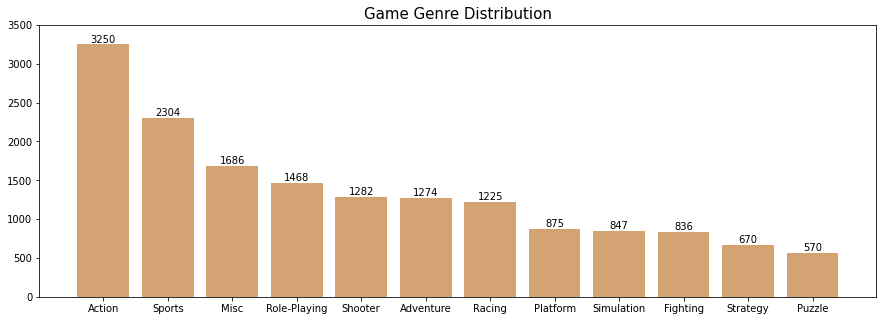

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
bars = plt.bar(x = genre_dist['Genre'], height = genre_dist['freq'], color= '#d4a373')
plt.title('Game Genre Distribution',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom'
  )

plt.ylim(0,3500)
plt.show()

**The most frequent** of Genre in dataset is **Action**, which is **3250** times.

### The 10 most frequent Publisher in the database?

In [37]:
most10_publisher = (df
                    .groupby('Publisher')
                    .agg(freq=('Publisher','count'))
                    .reset_index()
                    .sort_values('freq',ascending=False)
                    .head(10)
                    .sort_values('freq',ascending=True)
                    .reset_index(drop = True)
                    )
most10_publisher

,Publisher,freq
0,Take-Two Interactive,412
1,Sega,630
2,Sony Computer Entertainment,682
3,Nintendo,696
4,THQ,712
5,Konami Digital Entertainment,823
6,Ubisoft,917
7,Namco Bandai Games,928
8,Activision,966
9,Electronic Arts,1339


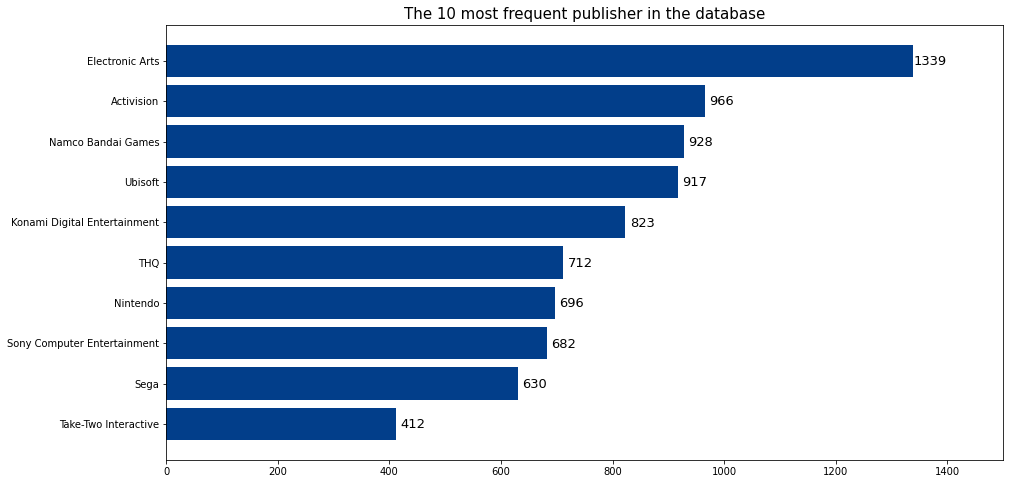

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
bars = plt.barh(y = most10_publisher['Publisher'], width = most10_publisher['freq'], color= '#023e8a')
plt.title('The 10 most frequent publisher in the database',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+30, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,1500)
plt.show()

**The most frequent** of Publisher is **Electronic Arts**, which is **1339** times.

## 3. Analysis of the world's best-selling games

### The 10 best selling games in North America, Europe, Japan and the rest of the world?

**North America**

In [39]:
best_sales_NA = (df
               .groupby('Name')
               .agg(freq=('NA_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
best_sales_NA

,Name,freq
0,Call of Duty: Modern Warfare 3,15.58
1,Wii Sports Resort,15.75
2,Mario Kart Wii,15.85
3,Super Mario World,15.99
4,Call of Duty: Black Ops,17.01
5,Grand Theft Auto V,23.46
6,Tetris,26.17
7,Duck Hunt,26.93
8,Super Mario Bros.,32.48
9,Wii Sports,41.49


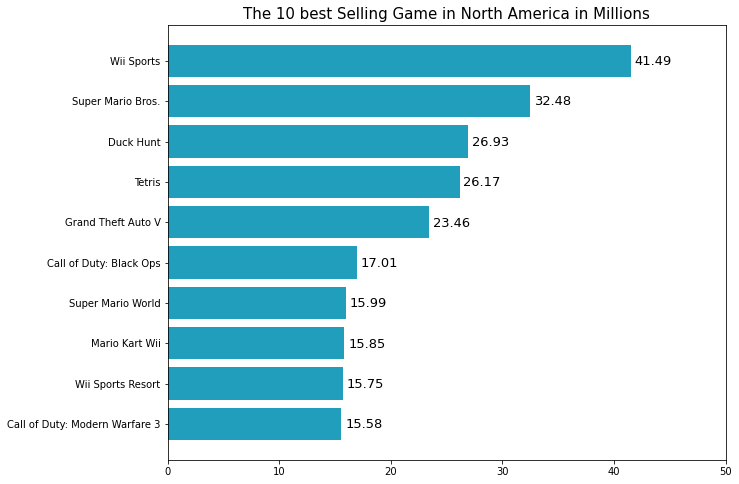

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best_sales_NA['Name'], width = best_sales_NA['freq'], color= '#219ebc')
plt.title('The 10 best Selling Game in North America in Millions',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+2, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,50)
plt.show()

**Wii Sports** is the best selling game in **North America**, Which is **41.49 Million** sales.

**Europe**

In [41]:
best_sales_EU = (df
               .groupby('Name')
               .agg(freq=('EU_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
best_sales_EU

,Name,freq
0,Nintendogs,11.00
1,Wii Sports Resort,11.01
2,Call of Duty: Black Ops II,11.05
3,FIFA 14,11.14
4,FIFA 16,11.29
5,Call of Duty: Modern Warfare 3,11.29
6,FIFA 15,12.40
7,Mario Kart Wii,12.88
8,Grand Theft Auto V,23.04
9,Wii Sports,29.02


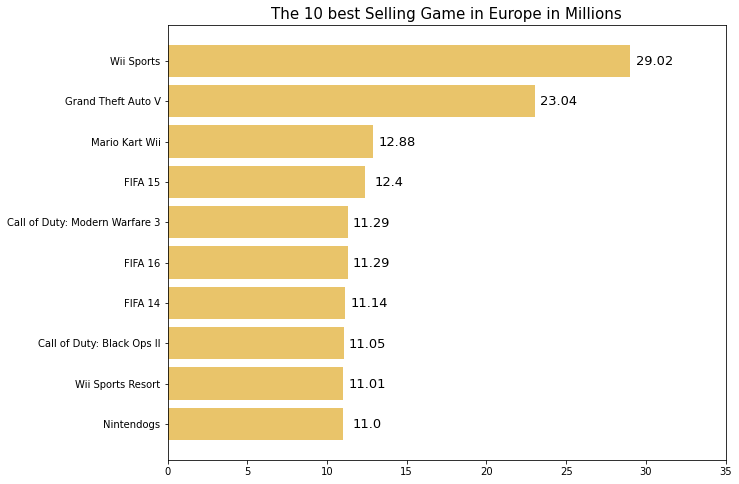

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best_sales_EU['Name'], width = best_sales_EU['freq'], color= '#e9c46a')
plt.title('The 10 best Selling Game in Europe in Millions',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+1.5, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,35)
plt.show()

**Wii Sports** is the best selling game in **Europe**, Which is **29.02 Million** sales.

**Japan**

In [43]:
best_sales_JP = (df
               .groupby('Name')
               .agg(freq=('JP_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
best_sales_JP

,Name,freq
0,Animal Crossing: Wild World,5.33
1,Pokemon Ruby/Pokemon Sapphire,5.38
2,Dragon Quest VII: Warriors of Eden,5.40
3,Pokemon Black/Pokemon White,5.65
4,Tetris,6.03
5,Pokemon Diamond/Pokemon Pearl,6.04
6,New Super Mario Bros.,6.50
7,Super Mario Bros.,6.96
8,Pokemon Gold/Pokemon Silver,7.20
9,Pokemon Red/Pokemon Blue,10.22


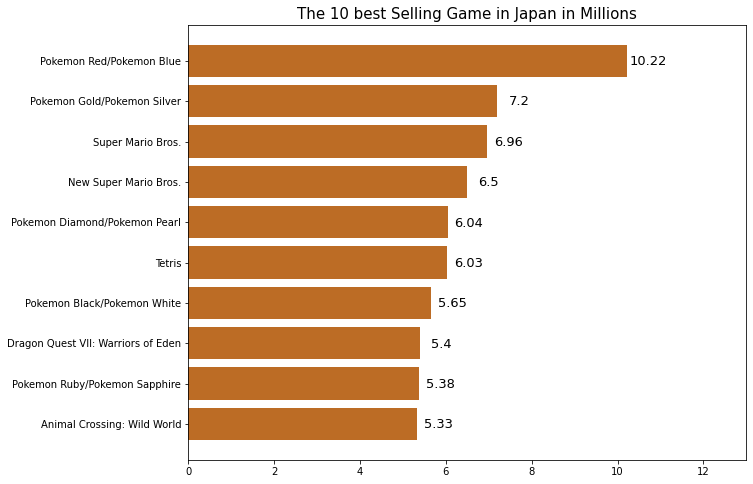

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best_sales_JP['Name'], width = best_sales_JP['freq'], color= '#bc6c25')
plt.title('The 10 best Selling Game in Japan in Millions',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+0.5, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,13)
plt.show()

**Pokemon Red/Pokemon Blue** is the best selling game in **Japan**, Which is **10.22 Million** sales.

**Global**

In [45]:
best_sales_Global = (df
               .groupby('Name')
               .agg(freq=('Global_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
best_sales_Global

,Name,freq
0,Call of Duty: Black Ops II,29.72
1,New Super Mario Bros.,30.01
2,Call of Duty: Modern Warfare 3,30.83
3,Pokemon Red/Pokemon Blue,31.37
4,Wii Sports Resort,33.00
5,Mario Kart Wii,35.82
6,Tetris,35.84
7,Super Mario Bros.,45.31
8,Grand Theft Auto V,55.92
9,Wii Sports,82.74


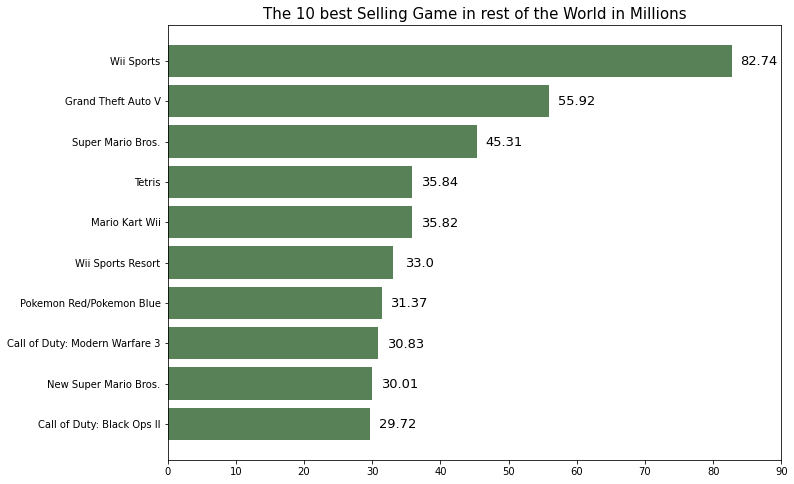

In [46]:
fig, ax = plt.subplots(figsize=(11,8))
bars = plt.barh(y = best_sales_Global['Name'], width = best_sales_Global['freq'], color= '#588157')
plt.title('The 10 best Selling Game in rest of the World in Millions',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+4, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,90)
plt.show()

**Wii Sports** is the best selling game in **the World**, Which is **82.74 Million** sales.

### The best selling games in the world from 1990 to 2000?

In [47]:
best_year_range = df[df['Year'] >= 1990]
best_year_range = best_year_range[best_year_range['Year'] <= 2000]

In [48]:
best_selling = (best_year_range
               .groupby('Name')
               .agg(freq=('Global_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
best_selling

,Name,freq
0,Mario Kart 64,9.87
1,Super Mario All-Stars,10.55
2,Gran Turismo,10.95
3,Super Mario Land 2: 6 Golden Coins,11.18
4,Donkey Kong Country,11.49
5,Super Mario 64,11.89
6,Pokémon Yellow: Special Pikachu Edition,14.64
7,Super Mario World,20.61
8,Pokemon Gold/Pokemon Silver,23.10
9,Pokemon Red/Pokemon Blue,31.37


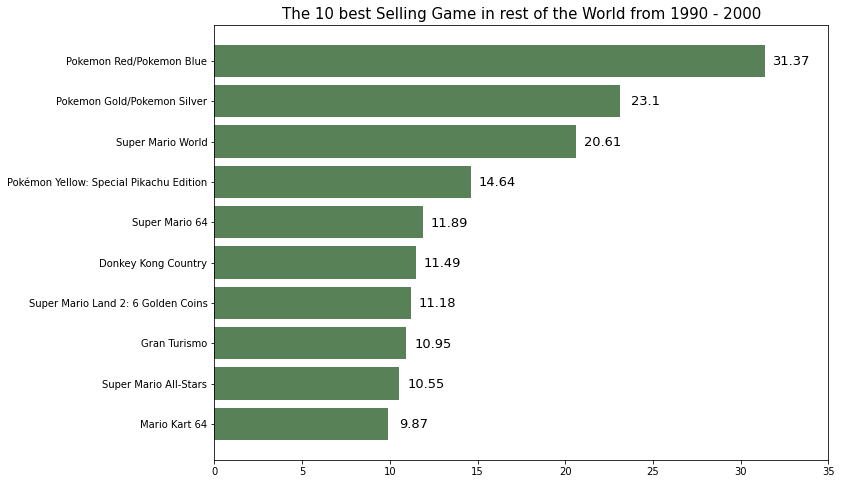

In [49]:
fig, ax = plt.subplots(figsize=(11,8))
bars = plt.barh(y = best_selling['Name'], width = best_selling['freq'], color= '#588157')
plt.title('The 10 best Selling Game in rest of the World from 1990 - 2000',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+1.5, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,35)
plt.show()

**Pokemon Red/Pokemon Blue** is the best selling game in **the World** at periode **1990 - 2000**, Which is **31.37 Million** sales.

## 4. Number of Sales per platform

### The 10 platforms with the highest number of game sales in the world?


In [50]:
best_platform = (df
               .groupby('Platform')
               .agg(freq=('Global_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=False)
               .head(10)
               .sort_values('freq',ascending=False)
               .reset_index(drop = True)
               )
best_platform

,Platform,freq
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.62
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.07
9,PC,254.70


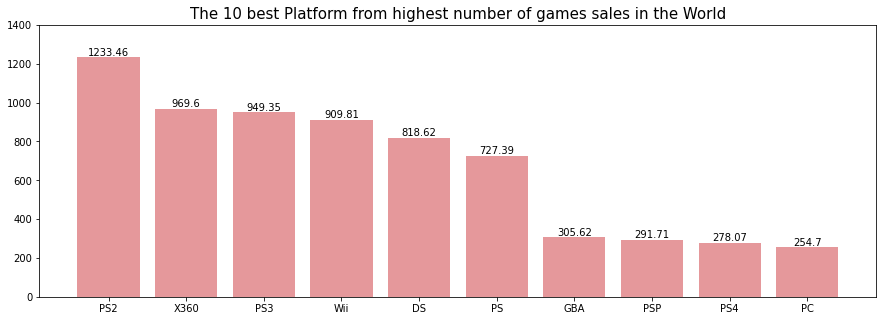

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
bars = plt.bar(x = best_platform['Platform'], height = best_platform['freq'], color= '#e5989b')
plt.title('The 10 best Platform from highest number of games sales in the World',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom'
  )

plt.ylim(0,1400)
plt.show()

**PS2** is be the best selling Platform in **the World**, Which is **1.23 Billion** sales.

## 5. Game Sales by Genre

### Best selling genres in the world?


**North America**

In [52]:
NA_selling = (df
               .groupby('Genre')
               .agg(freq=('NA_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
NA_selling

,Genre,freq
0,Strategy,67.83
1,Adventure,101.93
2,Puzzle,122.01
3,Simulation,181.51
4,Fighting,220.74
5,Role-Playing,326.50
6,Racing,356.93
7,Misc,396.92
8,Platform,445.99
9,Shooter,575.16


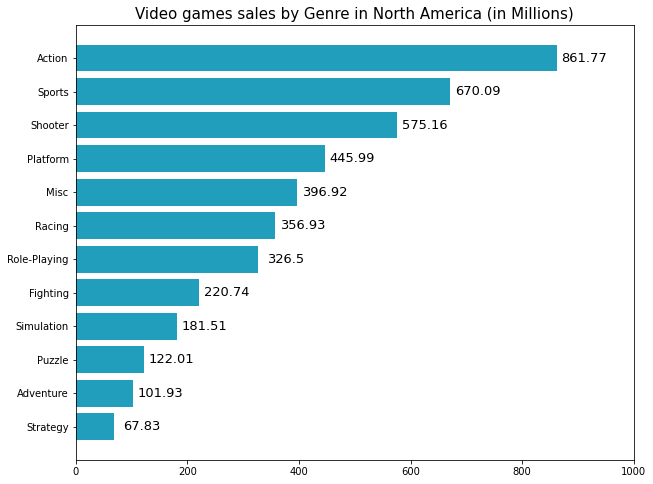

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = NA_selling['Genre'], width = NA_selling['freq'], color= '#219ebc')
plt.title('Video games sales by Genre in North America (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+50, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,1000)
plt.show()

**Action** is the best selling Genre in **North America**, Which is **861.77 Million** sales.

**Europe**

In [54]:
EU_selling = (df
               .groupby('Genre')
               .agg(freq=('EU_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
EU_selling

,Genre,freq
0,Strategy,44.84
1,Puzzle,50.52
2,Adventure,63.74
3,Fighting,100.00
4,Simulation,113.02
5,Role-Playing,187.57
6,Platform,200.65
7,Misc,211.77
8,Racing,236.31
9,Shooter,310.45


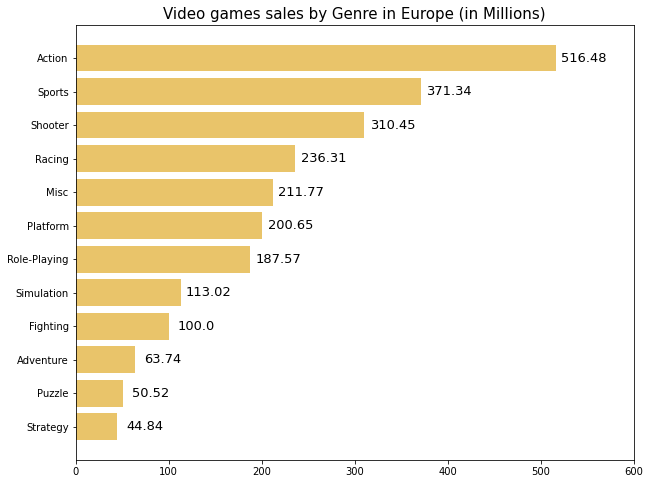

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = EU_selling['Genre'], width = EU_selling['freq'], color= '#e9c46a')
plt.title('Video games sales by Genre in Europe (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+30, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,600)
plt.show()

**Action** is the best selling Genre in **Europe**, Which is **516.48 Million** sales.

**Japan**

In [56]:
JP_selling = (df
               .groupby('Genre')
               .agg(freq=('JP_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
JP_selling

,Genre,freq
0,Shooter,38.18
1,Strategy,49.10
2,Adventure,51.99
3,Racing,56.61
4,Puzzle,56.68
5,Simulation,63.54
6,Fighting,87.15
7,Misc,106.67
8,Platform,130.65
9,Sports,134.76


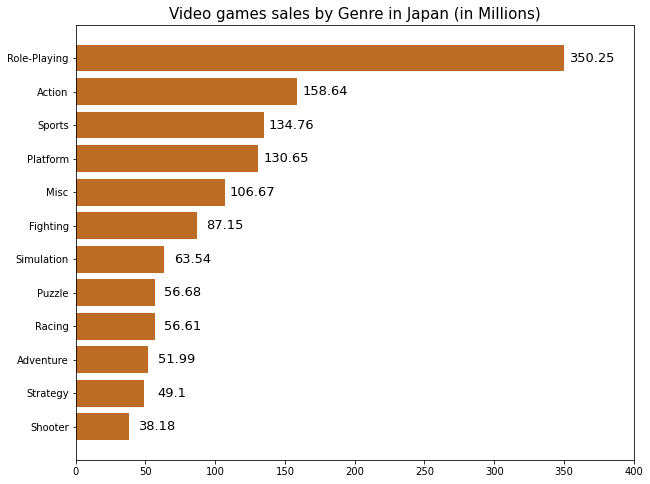

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = JP_selling['Genre'], width = JP_selling['freq'], color= '#bc6c25')
plt.title('Video games sales by Genre in Japan (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+20, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,400)
plt.show()

**Role-Playing** is the best selling Genre in **Japan**, Which is **350.25 Million** sales.

**Global**

In [58]:
global_selling = (df
               .groupby('Genre')
               .agg(freq=('Global_Sales','sum'))
               .reset_index()
               .sort_values('freq',ascending=True)
               .reset_index(drop = True)
               )
global_selling

,Genre,freq
0,Strategy,173.27
1,Adventure,234.59
2,Puzzle,242.21
3,Simulation,389.69
4,Fighting,444.05
5,Racing,726.76
6,Misc,789.87
7,Platform,829.13
8,Role-Playing,923.79
9,Shooter,1026.20


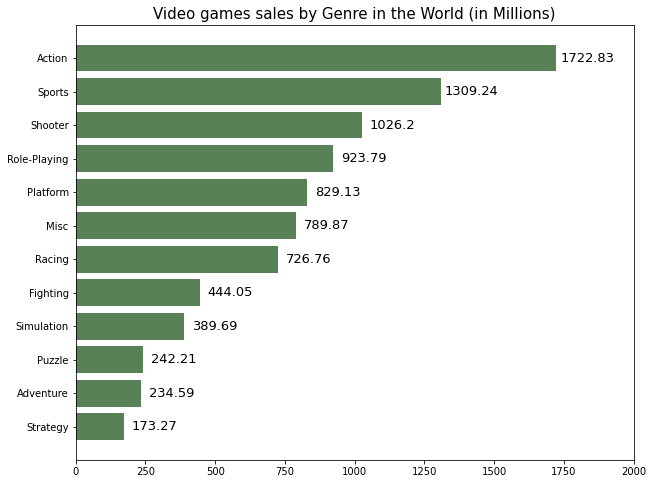

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = global_selling['Genre'], width = global_selling['freq'], color= '#588157')
plt.title('Video games sales by Genre in the World (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+110, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,2000)
plt.show()

**Action** is the best selling Genre in **the World**, Which is **1.72 Billion** sales.

## 6. Number of sales per publisher

### The 10 publishers with the most sales?

**North America**

In [60]:
best10_publisher_NA = (df
                    .groupby('Publisher')
                    .agg(freq=('NA_Sales','sum'))
                    .reset_index()
                    .sort_values('freq',ascending=False)
                    .head(10)
                    .sort_values('freq',ascending=True)
                    .reset_index(drop = True)
                    )
best10_publisher_NA

,Publisher,freq
0,Atari,101.23
1,Sega,108.78
2,Microsoft Game Studios,155.35
3,THQ,208.60
4,Take-Two Interactive,220.47
5,Ubisoft,252.54
6,Sony Computer Entertainment,265.22
7,Activision,426.01
8,Electronic Arts,584.22
9,Nintendo,815.75


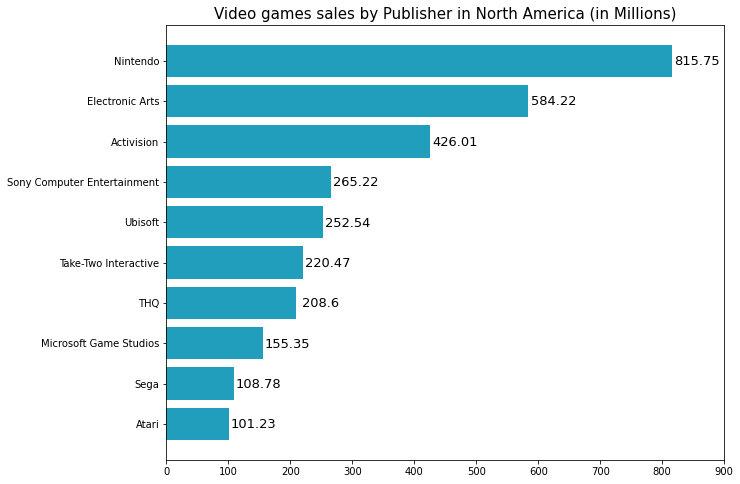

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best10_publisher_NA['Publisher'], width = best10_publisher_NA['freq'], color= '#219ebc')
plt.title('Video games sales by Publisher in North America (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+40, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,900)
plt.show()

**Nintendo** is the best selling Publisher in **North America**, Which is **815.75 Million** sales.

**Europe**

In [62]:
best10_publisher_EU = (df
                    .groupby('Publisher')
                    .agg(freq=('EU_Sales','sum'))
                    .reset_index()
                    .sort_values('freq',ascending=False)
                    .head(10)
                    .sort_values('freq',ascending=True)
                    .reset_index(drop = True)
                    )
best10_publisher_EU

,Publisher,freq
0,Microsoft Game Studios,68.61
1,Konami Digital Entertainment,68.62
2,Sega,81.41
3,THQ,94.60
4,Take-Two Interactive,117.95
5,Ubisoft,163.03
6,Sony Computer Entertainment,187.55
7,Activision,213.72
8,Electronic Arts,367.38
9,Nintendo,418.30


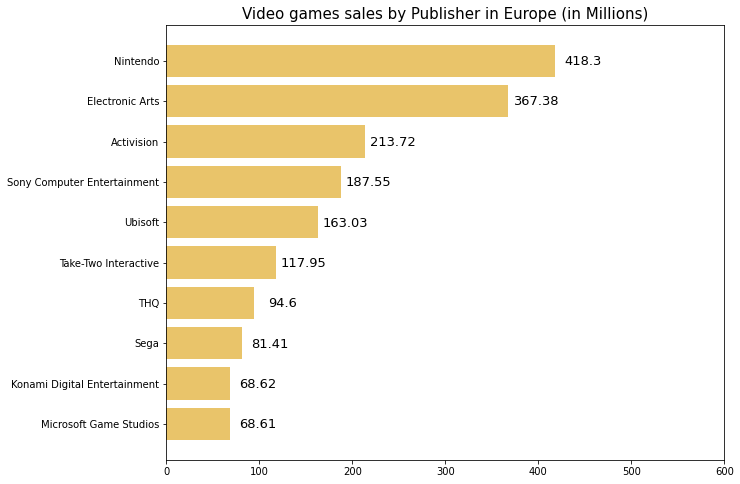

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best10_publisher_EU['Publisher'], width = best10_publisher_EU['freq'], color= '#e9c46a')
plt.title('Video games sales by Publisher in Europe (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+30, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,600)
plt.show()

**Nintendo** is the best selling Publisher in **Europe**, Which is **418.3 Million** sales.

**Japan**

In [64]:
best10_publisher_JP = (df
                    .groupby('Publisher')
                    .agg(freq=('JP_Sales','sum'))
                    .reset_index()
                    .sort_values('freq',ascending=False)
                    .head(10)
                    .sort_values('freq',ascending=True)
                    .reset_index(drop = True)
                    )
best10_publisher_JP

,Publisher,freq
0,Tecmo Koei,29.21
1,Enix Corporation,32.40
2,SquareSoft,40.13
3,Square Enix,49.79
4,Sega,56.15
5,Capcom,67.38
6,Sony Computer Entertainment,74.10
7,Konami Digital Entertainment,90.93
8,Namco Bandai Games,126.84
9,Nintendo,454.99


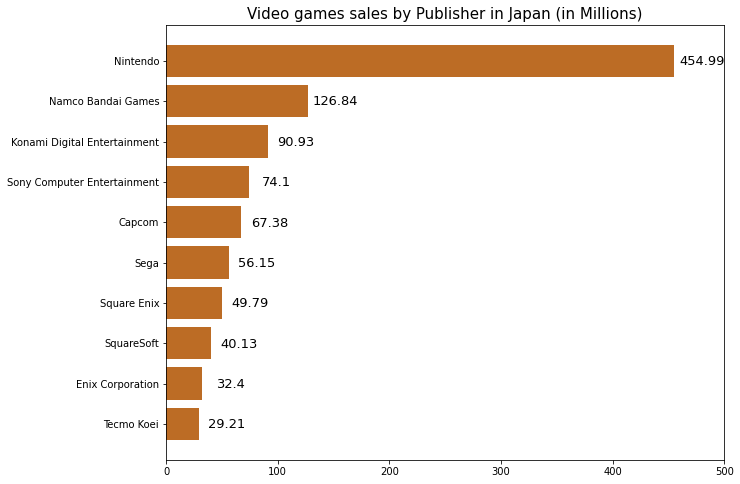

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best10_publisher_JP['Publisher'], width = best10_publisher_JP['freq'], color= '#bc6c25')
plt.title('Video games sales by Publisher in Japan (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+25, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,500)
plt.show()

**Nintendo** is the best selling Publisher in **Japan**, Which is **454.99 Million** sales.

**Global**

In [66]:
best10_publisher_gb = (df
                    .groupby('Publisher')
                    .agg(freq=('Global_Sales','sum'))
                    .reset_index()
                    .sort_values('freq',ascending=False)
                    .head(10)
                    .sort_values('freq',ascending=True)
                    .reset_index(drop = True)
                    )
best10_publisher_gb

,Publisher,freq
0,Namco Bandai Games,253.65
1,Sega,270.66
2,Konami Digital Entertainment,278.56
3,THQ,340.44
4,Take-Two Interactive,399.30
5,Ubisoft,473.25
6,Sony Computer Entertainment,607.28
7,Activision,721.41
8,Electronic Arts,1093.39
9,Nintendo,1784.43


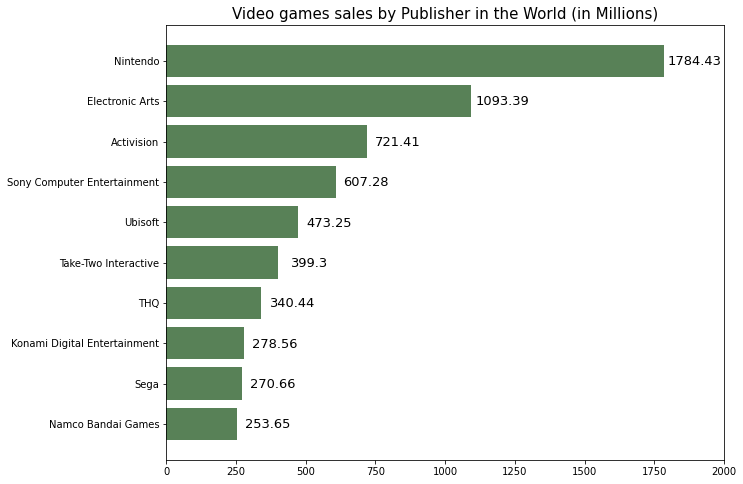

In [67]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.barh(y = best10_publisher_gb['Publisher'], width = best10_publisher_gb['freq'], color= '#588157')
plt.title('Video games sales by Publisher in the World (in Millions)',fontsize=15)

for bar in bars:
    plt.text(bar.get_width()+110, bar.get_y()+0.3,
             str(round((bar.get_width()), 2)),
             fontsize = 13,
             ha='center',
             color ='black')

plt.xlim(0,2000)
plt.show()

**Nintendo** is the best selling Publisher in **the World**, Which is **1.78 Billion** sales.

## 7. Global Sales Number per Year

In [68]:
global_sales_year = (df
                    .groupby('Year')
                    .agg(freq=('Global_Sales','sum'))
                    .reset_index()
                    .reset_index(drop = True)
                    )
global_sales_year

,Year,freq
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


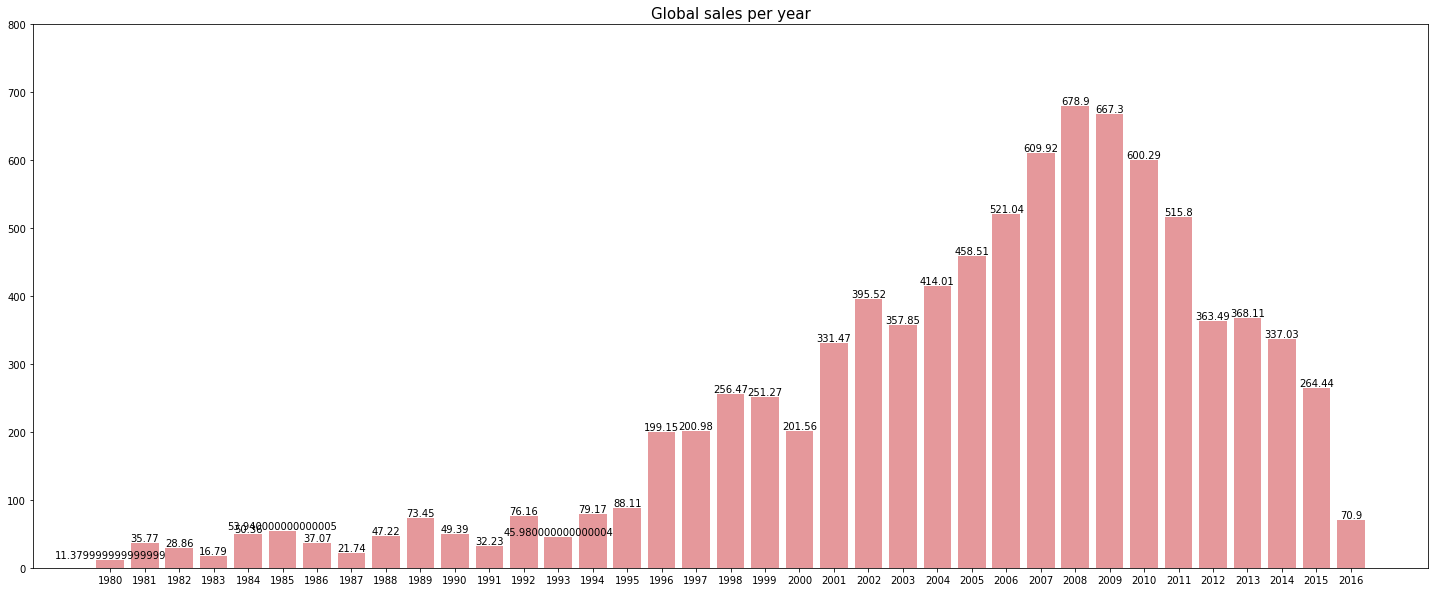

In [69]:
fig, ax = plt.subplots(figsize=(25,10))
bars = plt.bar(x = global_sales_year['Year'], height = global_sales_year['freq'], color= '#e5989b')
plt.xticks(list(range(1980,2017,1)))
plt.title('Global sales per year',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom'
  )

plt.ylim(0,800)
plt.show()

**The most total selling** is in **2008**, Which is **678.9 Million** sales. And **the least total selling** is in **1980**, Which is **11.38 Million** sales.